In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [4]:
movies = pd.read_csv('movies.csv')

In [5]:
titls = movies['title']

In [6]:
for title in titls:
    if(title == 'Forrest Gump (1994)'):
        print('yeeee',title)
        break
    else:
        continue

yeeee Forrest Gump (1994)


In [7]:
rating = pd.read_csv('ratings.csv')

In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [10]:
df = pd.merge(rating, movies, how='inner', on='movieId')

In [11]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [12]:
avgRating = df.groupby('title')['rating'].mean().sort_values(ascending=False)


In [13]:
avgRating.head()

title
Burn Up! (1991)                                     5.0
Absolute Giganten (1999)                            5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)    5.0
Erik the Viking (1989)                              5.0
Reality (2014)                                      5.0
Name: rating, dtype: float64

In [14]:
cntRating = df.groupby('title')['rating'].count().sort_values(ascending=False)

In [15]:
cntRating.head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [16]:
ratings =pd.DataFrame(df.groupby('title')['rating'].mean())

In [17]:
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000


In [18]:
ratings['n_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [19]:
ratings.head()

,rating,n_ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


(array([  7.21500000e+03,   7.83000000e+02,   3.44000000e+02,
          2.23000000e+02,   1.35000000e+02,   8.60000000e+01,
          6.80000000e+01,   3.60000000e+01,   2.90000000e+01,
          3.70000000e+01,   2.50000000e+01,   1.70000000e+01,
          1.30000000e+01,   7.00000000e+00,   6.00000000e+00,
          5.00000000e+00,   4.00000000e+00,   1.10000000e+01,
          2.00000000e+00,   6.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00]),
 array([   1.        ,   12.33333333,   23.66666667,   35.        ,
          46.33333333,   57.66666667,   69.        ,   80.33333333,
          91.66666667,  103.        ,  114.33333333,  125.66666667,
         137.        ,  148.33333333,  159.66666667,  171.        ,
         182.33333333,  193.66666667,  205.        ,  216.33333333,
         227.66666667,  239.        , 

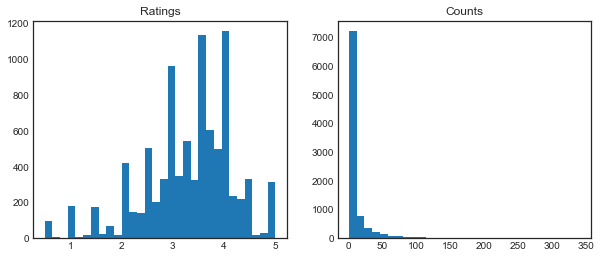

In [20]:
fig,axis = plt.subplots(ncols=2,figsize =(10,4))
#sns.distplot(ratings['rating'],ax = axis[0],bins = 30)
#sns.distplot(ratings.n_ratings,ax = axis[1],bins = 30)
axis[0].set_title('Ratings')
axis[0].hist(ratings['rating'], bins = 30)

axis[1].set_title('Counts')
axis[1].hist(ratings['n_ratings'], bins = 30)


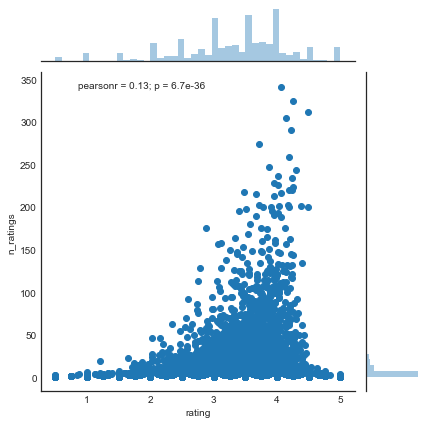

In [21]:
sns.jointplot(x='rating', y = 'n_ratings', data = ratings)

In [22]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [23]:
rating_mat=df.pivot_table(values='rating', index='userId', columns='title')

In [24]:
rating_mat.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
ratings.sort_values(by='n_ratings', ascending=False)

,rating,n_ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


In [26]:
movies[movies['title']=='Forrest Gump (1994)']

,movieId,title,genres
321,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [27]:
import math

In [28]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [30]:
rating_mat= df.pivot_table(values='rating', index='userId', columns='title')

In [31]:
rating_mat

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
ratings.sort_values('n_ratings', ascending=False).head()

,rating,n_ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291


In [34]:
movies[movies['title']=='Forrest Gump (1994)']

,movieId,title,genres
321,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [37]:
FG_use_ratings = rating_mat['Forrest Gump (1994)']
Matrix_use_ratings = rating_mat['Matrix, The (1999)']

In [39]:
FG_use_ratings.head(),Matrix_use_ratings.head()

(userId
 1    NaN
 2    3.0
 3    5.0
 4    5.0
 5    4.0
 Name: Forrest Gump (1994), dtype: float64, userId
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 Name: Matrix, The (1999), dtype: float64)

In [40]:
similar_to_FG = rating_mat.corrwith(FG_use_ratings)
similar_to_Matrix = rating_mat.corrwith(Matrix_use_ratings)

C:\Users\User1\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\numpy\lib\function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\User1\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [41]:
similar_to_FG.head()

title
"Great Performances" Cats (1998)           NaN
$9.99 (2008)                               1.0
'Hellboy': The Seeds of Creation (2004)    NaN
'Neath the Arizona Skies (1934)            NaN
'Round Midnight (1986)                     NaN
dtype: float64

In [43]:
cor_FG = pd.DataFrame(similar_to_FG,columns=['correlation'])

In [45]:
cor_FG.head()

,correlation
title,
"""Great Performances"" Cats (1998)",NaN
$9.99 (2008),1.0
'Hellboy': The Seeds of Creation (2004),NaN
'Neath the Arizona Skies (1934),NaN
'Round Midnight (1986),NaN


In [46]:
cor_FG.dropna(inplace=True)

In [47]:
cor_FG.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


In [50]:

cor_FG.sort_values(by='correlation',ascending=False).head()

,correlation
title,
$9.99 (2008),1.0
Things Change (1988),1.0
Character (Karakter) (1997),1.0
Water for Elephants (2011),1.0
"Watch, The (2012)",1.0


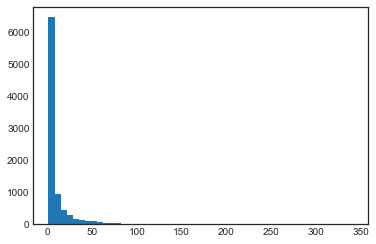

In [60]:
plt.hist(ratings['n_ratings'], bins=50);

In [61]:
cor_FG.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


In [62]:
cor_FG = cor_FG.join(ratings['n_ratings'])

In [63]:
cor_FG.head()

,correlation,n_ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.044946,19
(500) Days of Summer (2009),0.624458,45
*batteries not included (1987),0.603023,7
...And Justice for All (1979),0.173422,13


In [71]:
cor_FG[cor_FG['n_ratings']>50].sort_values(by = 'correlation', ascending=False).head()

,correlation,n_ratings
title,,
Forrest Gump (1994),1.000000,341
My Big Fat Greek Wedding (2002),0.626240,51
"Beautiful Mind, A (2001)",0.575922,114
"Few Good Men, A (1992)",0.555206,76
Million Dollar Baby (2004),0.545638,65


In [53]:
avg=cor_FG.groupby('title')['correlation'].mean().value_counts(ascending = False)
cnt = cor_FG.groupby('title')['correlation'].count().value_counts(ascending = False)

In [56]:
cnt.head()

1    5053
Name: correlation, dtype: int64

In [ ]:
df_cor_FG = pd.DataFrame(cor_FG.groupby('title')['correlation'].mean())
